#APRENDIZAJE NO SUPERVISADO GRUPO 8
##Integrantes


*   A. ABDALA
*   M. ACOSTA
*   D. BAULINA
*   C. GIOVINE

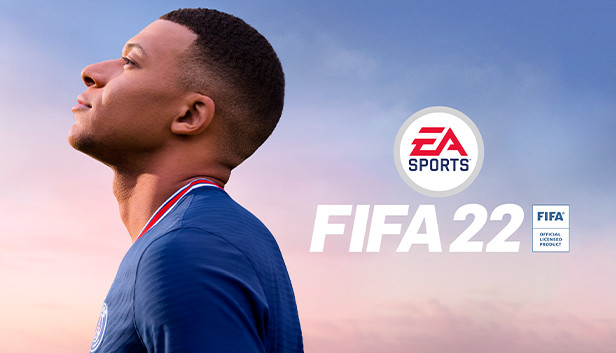

#Consigna

Práctico entregable: 
Utilizar la base de jugadores “players_22.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset . Considerar que la base 2022 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019. Realice comentarios en cada parte (verbose=True ;))

1. Análisis exploratorio de la base.
2. Evaluación visual  e intuitiva de a dos variables numéricas por vez.
3. Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros
4. Evaluación y Análisis de los clusters encontrados.
5. Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?
6. Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.


## 1.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Exploración-de-la-base

##Cargamos los datos bajados de la database de Kaggle

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/agustinabdala/diplodatos/main/raw_input_files/players_22.csv')
df.head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1987-06-24        170   
1       92         92  119500000.0  270000.0   32  1988-08-21        185   
2       91         91   45000000.0  270000.0   36  1985-02-05        187   
3       91         91  129000000.0  270000.0   29  1992-02-05        175   
4       91         91  125500000.0  350000.0   30  1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   
4         70          10.0      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   
4           1.0           RCM                17.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   
4  2015-08-30                     2025.0               7          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   
4          1325.0             RCM                   7.0          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   
4       Yes         232200000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shoote

In [ ]:
df_pca = df.copy()
df.isna().sum()

sofifa_id                          0
player_url                         0
short_name                         0
long_name                          0
player_positions                   0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
dob                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
club_name                         61
league_name                       61
league_level                      61
club_position                     61
club_jersey_number                61
club_loaned_from               18137
club_joined                     1163
club_contract_valid_until         61
nationality_id                     0
nationality_name                   0
nation_team_id                 18480
nation_position                18480
nation_jersey_number           18480
p

In [ ]:
print(len(df.columns), 'variables')

110 variables


In [ ]:
df.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [ ]:
print(df.describe())

           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863

tipos de variables:

In [ ]:
#completar

89
[85 71 87 94 13 78 15 18 80 68 75 14 83 58 53 79 20 91 17 12 66 88 73 11
 47 70 86 55 77 82 92 54 63 65 62 30 42 81 69 74 40 60 44 16 76 49 84 64
 56 52 72 57 22 51 35 45 24 50 67  9 27 25 59 10 46 38 19 36 34 48 39 61
 89 90 29 41 43  8 37 32 28 23 31 21 33 26  7  6]


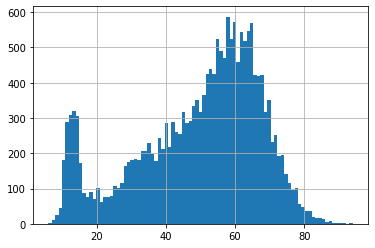

In [ ]:
print(df.attacking_crossing.max()-df.attacking_crossing.min()+1)
nbins=89
print(df['attacking_crossing'].unique())
df['attacking_crossing'].hist(bins = nbins)

In [ ]:
print(df.overall)

0        93
1        92
2        91
3        91
4        91
         ..
19234    47
19235    47
19236    47
19237    47
19238    47
Name: overall, Length: 19239, dtype: int64


**Realizamos el histograma de la variable "Overall" (Desempeño global)**

47


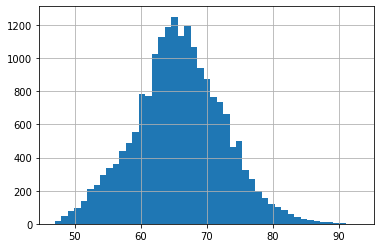

In [ ]:
nbins=1*(df.overall.max()-df.overall.min())+1
df['overall'].hist(bins = nbins)
print(nbins)

La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings), utilizando redondeo

La variable 'Overall' es numérica discreta, (pero de "naturaleza" continua) así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100, más allá del tipo de dato en estos casos.
       
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'. 

Mejores jugadores por posición:

In [ ]:
best_players_per_position=df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions','short_name','overall']]
best_players_per_position.head(5)

player_positions       short_name  overall
28                CAM  Bruno Fernandes       88
2052         CAM, CDM        P. Kasami       74
2711     CAM, CDM, CM      A. Ricaurte       73
1589     CAM, CDM, LM   Álex Fernández       75
8515     CAM, CDM, RM       M. Miranda       67

Conteos por posiciones

In [ ]:
pd.DataFrame(df.player_positions.value_counts().sort_index())

player_positions
CAM                        219
CAM, CDM                    11
CAM, CDM, CM                 4
CAM, CDM, LM                 1
CAM, CDM, RM                 1
CAM, CDM, ST                 1
CAM, CF                     31
CAM, CF, CM                  6
CAM, CF, LM                  4
CAM, CF, LW                  2
CAM, CF, RM                  3
CAM, CF, RW                  4
CAM, CF, ST                  3
CAM, CM                    249
CAM, CM, CDM                22
CAM, CM, CF                 13
CAM, CM, LM                 41
CAM, CM, LW                 11
CAM, CM, LWB                 1
CAM, CM, RM                 30
CAM, CM, RW                 12
CAM, CM, RWB                 1
CAM, CM, ST                 16
CAM, LM                     64
CAM, LM, CF                  6
CAM, LM, CM                 18
CAM, LM, LW                  5
CAM, LM, RM                 26
CAM, LM, RW                  1
CAM, LM, ST                  9
CAM, LW                     20
CAM, LW, CF                  5
CAM, LW, CM                  8
CAM, LW, LB                  1
CAM, LW, LM                  6
CAM, LW, RW                 14
CAM, LW, ST                  4
CAM, RB                      1
CAM, RM                     70
CAM, RM, CF                  3
CAM, RM, CM                 17
CAM, RM, LM                 29
CAM, RM, RB                  1
CAM, RM, RW                  8
CAM, RM, RWB                 1
CAM, RM, ST                  6
CAM, RW                     21
CAM, RW, CF                  2
CAM, RW, CM                  3
CAM, RW, LW                 13
CAM, RW, RM                  1
CAM, RW, ST                  5
CAM, RWB, CM                 2
CAM, ST                     59
CAM, ST, CDM                 1
CAM, ST, CF                  2
CAM, ST, CM                 13
CAM, ST, LM                  7
CAM, ST, LW                  3
CAM, ST, RM                  6
CAM, ST, RW                  4
CB                        2423
CB, CAM                      1
CB, CDM                    202
CB, CDM, CM                 38
CB, CDM, LB                  5
CB, CDM, RB                  7
CB, CF                       1
CB, CM                      16
CB, CM, CDM                  4
CB, CM, RB                   1
CB, LB                     232
CB, LB, CDM                  4
CB, LB, CM                   1
CB, LB, LM                   5
CB, LB, LWB                  3
CB, LB, RB                  12
CB, LB, RM                   1
CB, LB, RWB                  1
CB, LM                       2
CB, LM, RM                   1
CB, LWB                     11
CB, LWB, LB                  3
CB, LWB, LM                  1
CB, LWB, RWB                 1
CB, RB                     295
CB, RB, CDM                 16
CB, RB, CM                   1
CB, RB, LB                  20
CB, RB, LM                   1
CB, RB, RM                   3
CB, RB, RWB                  4
CB, RM                       1
CB, RM, RB                   1
CB, RWB                     12
CB, RWB, RB                  3
CB, RWB, RM                  2
CB, ST                       4
CDM                        294
CDM, CAM                     9
CDM, CAM, CM                 8
CDM, CAM, LM                 1
CDM, CAM, RB                 1
CDM, CAM, RM                 1
CDM, CB                    119
CDM, CB, CM                 41
CDM, CB, LB                  2
CDM, CB, RB                  6
CDM, CB, RM                  2
CDM, CM                    953
CDM, CM, CAM                38
CDM, CM, CB                 71
CDM, CM, LB                  9
CDM, CM, LM                  5
CDM, CM, RB                 24
CDM, CM, RM                 22
CDM, CM, RWB                 2
CDM, CM, ST                  1
CDM, LB                      6
CDM, LB, CB                  3
CDM, LB, LM                  2
CDM, LB, RB                  1
CDM, LM                      2
CDM, LM, CM                  1
CDM, LM, LB                  1
CDM, RB                     18
CDM, RB, CB                  2
CDM, RB, CM                  5
CDM, RB, LB    

Mejores Promedios de Overall por equipos

In [ ]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

club_name    overall
368             Juventus  79.961538
470  Paris Saint-Germain  79.454545
358                Inter  78.857143
241    FC Bayern München  78.071429
412    Manchester United  78.000000
509       Real Madrid CF  77.757576
434               Napoli  77.500000
63              Atalanta  77.480000

## 2.-Preparación-de-los-datos-a analizar

**Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("Overall"),**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [ ]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling','skill_curve', 'skill_fk_accuracy',  'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
                  'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
                  'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                  'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
                  'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [ ]:
#This df will be used later in TSNE
df_best_without_gk = df_n.copy()
df_best_without_gk.drop(df_best_without_gk.loc[df_best_without_gk['player_positions']=='GK'].index, axis=0, inplace=True)
df_best_without_gk

sofifa_id                                         player_url  \
0        158023  https://sofifa.com/player/158023/lionel-messi/...   
1        188545  https://sofifa.com/player/188545/robert-lewand...   
2         20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3        190871  https://sofifa.com/player/190871/neymar-da-sil...   
4        192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...         ...                                                ...   
4588     261987  https://sofifa.com/player/261987/antonio-blanc...   
4589     262411  https://sofifa.com/player/262411/miguel-crespo...   
4590     262815  https://sofifa.com/player/262815/giannis-kotsi...   
4591     263230  https://sofifa.com/player/263230/milutin-osmaj...   
4592     263383  https://sofifa.com/player/263383/stjepan-lonca...   

             short_name                            long_name player_positions  \
0              L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1        R. Lewandowski                   Robert Lewandowski               ST   
2     Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3             Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4          K. De Bruyne                      Kevin De Bruyne          CM, CAM   
...                 ...                                  ...              ...   
4588             Blanco                 Antonio Blanco Conde          CM, CDM   
4589      Miguel Crespo               Miguel Crespo da Silva               CM   
4590        G. Kotsiras                     Giannis Kotsiras           RB, RM   
4591         M. Osmajić                      Milutin Osmajić       ST, LM, RM   
4592          S. Lončar                       Stjepan Lončar         CDM, CAM   

      overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0          93         93   78000000.0  320000.0   34  1987-06-24        170   
1          92         92  119500000.0  270000.0   32  1988-08-21        185   
2          91         91   45000000.0  270000.0   36  1985-02-05        187   
3          91         91  129000000.0  270000.0   29  1992-02-05        175   
4          91         91  125500000.0  350000.0   30  1991-06-28        181   
...       ...        ...          ...       ...  ...         ...        ...   
4588       71         83    4500000.0   51000.0   20  2000-07-23        176   
4589       71         76    2800000.0   24000.0   24  1996-09-11        183   
4590       71         71    1700000.0     600.0   28  1992-12-16        183   
4591       71         81    4200000.0   15000.0   21  1999-07-25        185   
4592       71         79    3900000.0     550.0   24  1996-11-10        187   

      weight_kg  club_team_id            club_name  \
0            72          73.0  Paris Saint-Germain   
1            81          21.0    FC Bayern München   
2            83          11.0    Manchester United   
3            68          73.0  Paris Saint-Germain   
4            70          10.0      Manchester City   
...         ...           ...                  ...   
4588         68         243.0       Real Madrid CF   
4589         78         326.0        Fenerbahçe SK   
4590         77        1884.0     Panathinaikos FC   
4591         76        1968.0             Cádiz CF   
4592         74        1874.0      Ferencvárosi TC   

                        league_name  league_level club_position  \
0                    French Ligue 1           1.0            RW   
1              German 1. Bundesliga           1.0            ST   
2            English Premier League           1.0            ST   
3                    French Ligue 1           1.0            LW   
4            English Premier League           1.0           RCM   
...                             ...           ...           ...   
4588         Spain Primera Division           1.0           RES   
4589              Turkish Süper Lig           1.0         

**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [ ]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

In [ ]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [ ]:
df_skills.head(4)

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  85                   95                          70   
1                  71                   95                          90   
2                  87                   95                          90   
3                  85                   83                          63   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       91                 88               96           93   
1                       85                 89               85           79   
2                       80                 86               88           81   
3                       86                 86               95           88   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  91                  96   
1                 85                  70                  88   
2                 84                  77                  88   
3                 87                  81                  95   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     80                91   
1                     77                     79                77   
2                     85                     88                86   
3                     93                     89                96   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  94                95                86             68   
1                  93                82                90             85   
2                  94                74                94             95   
3                  89                84                80             64   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             72              69                94                    44   
1             76              86                87                    81   
2             77              77                93                    63   
3             81              53                81                    63   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       49                     95                81   
2                       29                     95                76   
3                       37                     86                90   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0                   75                   96                           20   
1                   90                   88                           35   
2                   88                   95                           24   
3                   93                   93                           35   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         35                        24                   6   
1                         42                        19                  15   
2                         32                        24                   7   
3                         32                        29                   9   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                     6                   12                        8   
2                    11                   15                       14   
3                     9                   15                       15   

   goalkeeping_reflexes  
0                     8  
1                    10  
2                    11  
3                    11

## 3.-Exploratorio-Visual-para-Clustering

Visualizamos los datos (jugadores) según sus habilidades es decir, en un espacio 34 dimensional. Cómo hacemos? empecemos de a dos variables numéricas por vez

**Consigna de trabajo:** visualizar a los jugadores (datos) usando las variables numéricas en skill_ratings de a pares. Emergen grupos/clusters?

In [ ]:
skills_ratings

['attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

In [ ]:
#data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]
skill_2=skills_ratings[10]

Gráfica con matplotlib.pyplot, liviana pero más sencilla

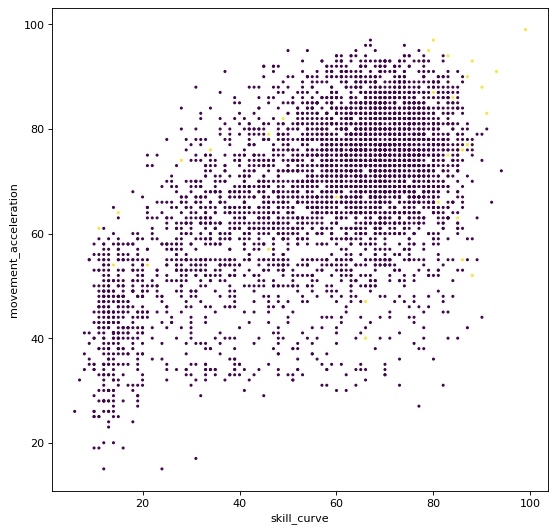

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack)
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

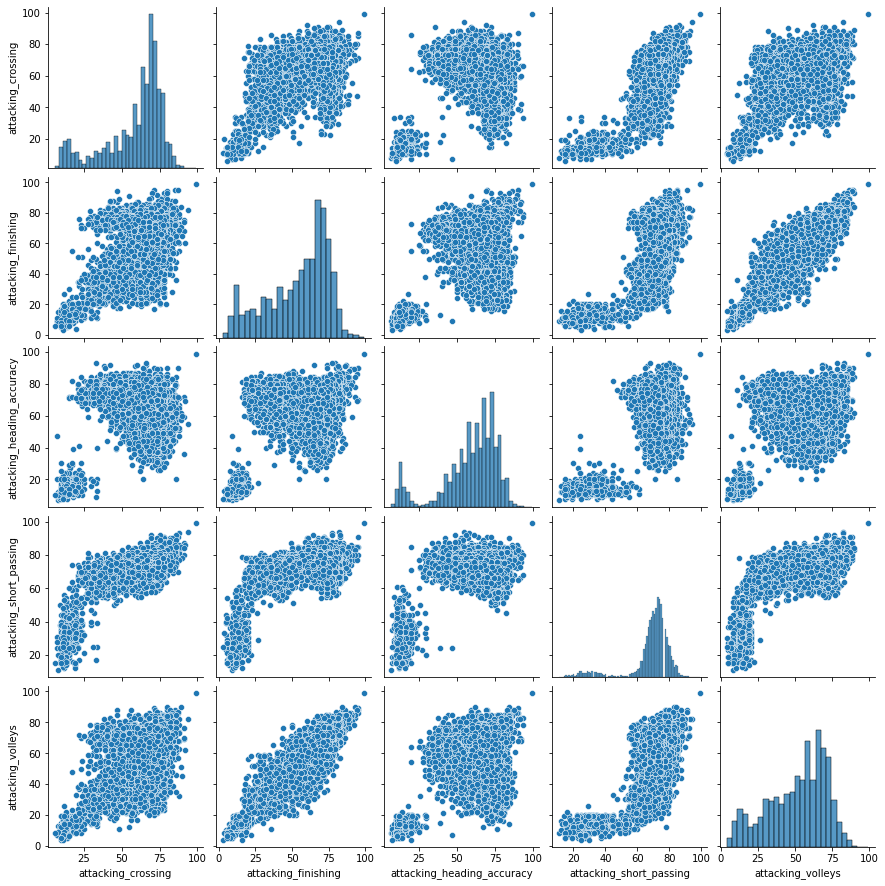

In [ ]:
sns.pairplot(df_skills[skills_ratings[0:5]])

Gráfica con Plotly, más completa e interactiva pero un poco pesada

In [ ]:
#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[2]
skill_2=skills_ratings[3]

In [ ]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab
fig.show(renderer="colab")

**Consigna de trabajo:** buscar agrupamientos de jugadores de manera intuitiva por cercanía (en espacios bidimensionales, de a dos variables por vez).

Que siginifica cercanía? cómo se mide? en que espacio/s están buscando? 

Si se encuentran, tratar de explicarlos visualmente.

-----------------------------------------------------
En próxima gráfica, similar a la anterior, también se diferencian los mejores jugadores y alguna característica/variable de interés (que pueden cambiar)

Se puede ubicar también un jugador en particular. Con la siguiente linea de comando, por ejemplo, Leo Messi: 

In [ ]:
#P/Gráfico 2

#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 

bool_crack=df_n["overall"] > 85
bool_elecc=df_n["club_name"]=='FC Barcelona' 
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]  #6
skill_2=skills_ratings[25]  #25

Gráfica con plotly

In [ ]:
palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab
fig.show(renderer="colab")

**Identifiquemos algunos jugadores por nombre**

In [ ]:
print(df_n.loc[0:43,"short_name"])

0              L. Messi
1        R. Lewandowski
2     Cristiano Ronaldo
3             Neymar Jr
4          K. De Bruyne
5              J. Oblak
6             K. Mbappé
7              M. Neuer
8         M. ter Stegen
9               H. Kane
10             N. Kanté
11           K. Benzema
12          T. Courtois
13               H. Son
14             Casemiro
15          V. van Dijk
16              S. Mané
17             M. Salah
18              Ederson
19           J. Kimmich
20              Alisson
21        G. Donnarumma
22         Sergio Ramos
23            L. Suárez
24             T. Kroos
25            R. Lukaku
26             K. Navas
27          R. Sterling
28      Bruno Fernandes
29           E. Haaland
30            S. Agüero
31            H. Lloris
32            L. Modrić
33          Á. Di María
34          W. Szczęsny
35            T. Müller
36          C. Immobile
37             P. Pogba
38          M. Verratti
39           Marquinhos
40          L. Goretzka
41            P.

# EJERCICIO 3
###Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros

##**Clustering-con-Kmeans**

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
# Número de clusters buscado
n_clust =5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)
df_clusters=df_n.copy()
df_clusters['kmeans_5'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters["player_positions"] = df_clusters["player_positions"].str.split(',').str[0]
df_clusters.head(4)

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


sofifa_id                                         player_url  \
0   158023.0  https://sofifa.com/player/158023/lionel-messi/...   
1   188545.0  https://sofifa.com/player/188545/robert-lewand...   
2    20801.0  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3   190871.0  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini               RW   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro               ST   
3          Neymar Jr        Neymar da Silva Santos Júnior               LW   

   overall  potential    value_eur  wage_eur   age         dob  height_cm  \
0       93       93.0   78000000.0  320000.0  34.0  1987-06-24      170.0   
1       92       92.0  119500000.0  270000.0  32.0  1988-08-21      185.0   
2       91       91.0   45000000.0  270000.0  36.0  1985-02-05      187.0   
3       91       91.0  129000000.0  270000.0  29.0  1992-02-05      175.0   

   weight_kg  club_team_id            club_name             league_name  \
0       72.0          73.0  Paris Saint-Germain          French Ligue 1   
1       81.0          21.0    FC Bayern München    German 1. Bundesliga   
2       83.0          11.0    Manchester United  English Premier League   
3       68.0          73.0  Paris Saint-Germain          French Ligue 1   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0            52.0        Argentina   
1  2014-07-01                     2023.0            37.0           Poland   
2  2021-08-27                     2023.0            38.0         Portugal   
3  2017-08-03                     2025.0            54.0           Brazil   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0        4.0          4.0                       5.0   Medium/Low    Unique   
1        4.0          4.0                       5.0  High/Medium    Unique   
2        4.0          5.0                       5.0     High/Low    Unique   
3        5.0          5.0                       5.0  High/Medium    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
3  #Speedster, #Dribbler, #Playmaker, #FK Special...   

                                       player_traits  pace  shooting  passing  \
0  Finesse Shot, Long Shot Taker (AI), Playmaker ...  85.0      92.0     91.0   
1  Solid Player, Finesse Shot, Outside Foot Shot,...  78.0      92.0     79.0   
2  Power Free-Kick, Flair, Long Shot Taker (AI), ...  87.0      94.0     80.0   
3  Injury Prone, Flair, Speed Dribbler (AI), Play...  91.0      83.0     86.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       95.0       34.0    65.0                  85                   95   


###Cantidad por clusters

In [ ]:
# creacion de grupos usando groupby
group = df_clusters.groupby('kmeans_5')
  
# conteo de observaciones
group.count()

sofifa_id  player_url  short_name  long_name  player_positions  \
kmeans_5                                                                   
0              1009        1009        1009       1009              1009   
1               444         444         444        444               444   
2               897         897         897        897               897   
3              1672        1672        1673       1672              1672   
4               571         571         571        571               571   

          overall  potential  value_eur  wage_eur   age   dob  height_cm  \
kmeans_5                                                                   
0            1009       1009       1004      1006  1009  1009       1009   
1             444        444        439       439   444   444        444   
2             897        897        893       893   897   897        897   
3            1673       1672       1660      1660  1672  1672       1672   
4             571        571        569       570   571   571        571   

          weight_kg  club_team_id  club_name  league_name  league_level  \
kmeans_5                                                                  
0              1009          1006       1006         1006          1006   
1               444           439        439          439           439   
2               897           893        893          893           893   
3              1672          1660       1660         1660          1660   
4               571           570        570          570           570   

          club_position  club_jersey_number  club_loaned_from  club_joined  \
kmeans_5                                                                     
0                  1006                1006                64          942   
1                   439                 439                17          422   
2                   893                 893                52          841   
3                  1660                1660                94         1566   
4                   570                 570                63          507   

          club_contract_valid_until  nationality_id  nationality_name  \
kmeans_5                                                                
0                              1006            1009              1009   
1                               439             444               444   
2                               893             897               897   
3                              1660            1672              1672   
4                               570             571               571   

          nation_team_id  nation_position  nation_jersey_number  \
kmeans_5                                                          
0                    120              120                   120   
1                     78               78                    78   
2                     97               97                    97   
3                    232              232                   232   
4                     59               59                    59   

          preferred_foot  weak_foot  skill_moves  international_reputation  \
kmeans_5                                                                     
0                   1009       1009         1009                      1009   
1                    444        444          444                       444   
2                    897        897          897                       897   
3                   1672       1672         1672                      1672   
4                    571        571          571                       571   

          work_rate  body_type  real_face  release_clause_eur  player_tags  \
kmeans_5                                                                     
0              1009       1009       1009                 940          247   
1               444        444        444                 422            0   
2               897        897

In [ ]:
df_clusters.head(2)

sofifa_id                                         player_url  \
0   158023.0  https://sofifa.com/player/158023/lionel-messi/...   
1   188545.0  https://sofifa.com/player/188545/robert-lewand...   

       short_name                       long_name player_positions  overall  \
0        L. Messi  Lionel Andrés Messi Cuccittini               RW       93   
1  R. Lewandowski              Robert Lewandowski               ST       92   

   potential    value_eur  wage_eur   age         dob  height_cm  weight_kg  \
0       93.0   78000000.0  320000.0  34.0  1987-06-24      170.0       72.0   
1       92.0  119500000.0  270000.0  32.0  1988-08-21      185.0       81.0   

   club_team_id            club_name           league_name  league_level  \
0          73.0  Paris Saint-Germain        French Ligue 1           1.0   
1          21.0    FC Bayern München  German 1. Bundesliga           1.0   

  club_position  club_jersey_number club_loaned_from club_joined  \
0            RW                30.0              NaN  2021-08-10   
1            ST                 9.0              NaN  2014-07-01   

   club_contract_valid_until  nationality_id nationality_name  nation_team_id  \
0                     2023.0            52.0        Argentina          1369.0   
1                     2023.0            37.0           Poland          1353.0   

  nation_position  nation_jersey_number preferred_foot  weak_foot  \
0              RW                  10.0           Left        4.0   
1              RS                   9.0          Right        4.0   

   skill_moves  international_reputation    work_rate body_type real_face  \
0          4.0                       5.0   Medium/Low    Unique       Yes   
1          4.0                       5.0  High/Medium    Unique       Yes   

   release_clause_eur                                        player_tags  \
0         144300000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1         197200000.0  #Aerial Threat, #Distance Shooter, #Clinical F...   

                                       player_traits  pace  shooting  passing  \
0  Finesse Shot, Long Shot Taker (AI), Playmaker ...  85.0      92.0     91.0   
1  Solid Player, Finesse Shot, Outside Foot Shot,...  78.0      92.0     79.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       95.0       34.0    65.0                  85                   95   
1       86.0       44.0    82.0                  71                   95   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       91                 88   
1                          90                       85                 89   

   skill_dribbling  skill_curve  ...  power_strength  power_long_shots  \
0               96           93  ...              69                94   
1               85           79  ...              86                87   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    44                       40                     93   
1                    81                       49                     95   

   mentality_vision  mentality_penalties  mentality_composure  \
0                95                   75                   96   
1                81                   90                   88   

   defending_marking_awareness  defending_standing_tackle  \
0                           20                         35   
1                           35                         42   

   defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                        24                   6                    11   
1                        19                  15                     6   

   goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                   15                       14                     8   
1                   12                        8                    10   

   g

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]), <a list of 10 Text major ticklabel objects>)

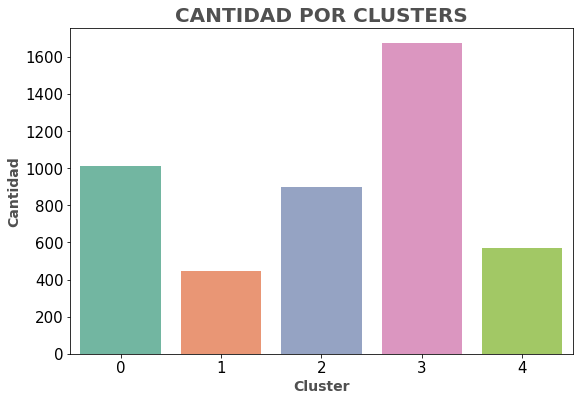

In [ ]:
 #Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=df_clusters, x='kmeans_5', palette="Set2")

plt.title('CANTIDAD POR CLUSTERS', 
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=14, fontweight='bold', color='#505050')
plt.xlabel("Cluster", size=14, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

####Tabla de contingencia

A continuación se realiza una tabla de contingencia para ver como quedan armados los clusters segun la posición del jugador

In [ ]:
round(pd.crosstab(df_clusters.kmeans_5,df_clusters.player_positions,margins=True, normalize=True),2)

player_positions   CAM    CB   CDM    CF    CM   GK    LB    LM    LW   LWB  \
kmeans_5                                                                      
0                 0.06  0.00  0.00  0.01  0.01  0.0  0.00  0.04  0.02  0.00   
1                 0.00  0.00  0.00  0.00  0.00  0.1  0.00  0.00  0.00  0.00   
2                 0.00  0.15  0.02  0.00  0.00  0.0  0.01  0.00  0.00  0.00   
3                 0.01  0.02  0.08  0.00  0.10  0.0  0.06  0.01  0.00  0.01   
4                 0.00  0.00  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00   
All               0.07  0.17  0.10  0.01  0.11  0.1  0.07  0.05  0.02  0.01   

player_positions    RB    RM    RW   RWB    ST   All  
kmeans_5                                              
0                 0.00  0.04  0.02  0.00  0.02  0.22  
1                 0.00  0.00  0.00  0.00  0.00  0.10  
2                 0.01  0.00  0.00  0.00  0.00  0.20  
3                 0.06  0.01  0.00  0.01  0.00  0.36  
4                 0.00  0.00  0.00  0.00  0.11  0.12  
All               0.07  0.05  0.03  0.01  0.14  1.00

Se puede ver en tabla que los arqueros (GK) quedan posicionados en el primer cluster

<Figure size 1296x864 with 0 Axes>

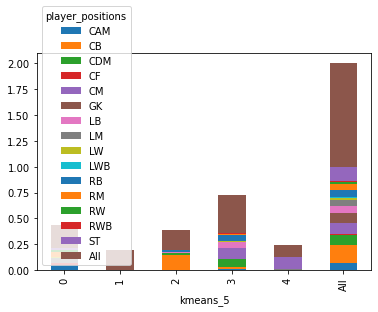

In [ ]:
pd.crosstab(df_clusters.kmeans_5,df_clusters.player_positions,margins=True, normalize=True).plot(kind='bar',stacked=True)

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]

In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
fig.show(renderer="colab")

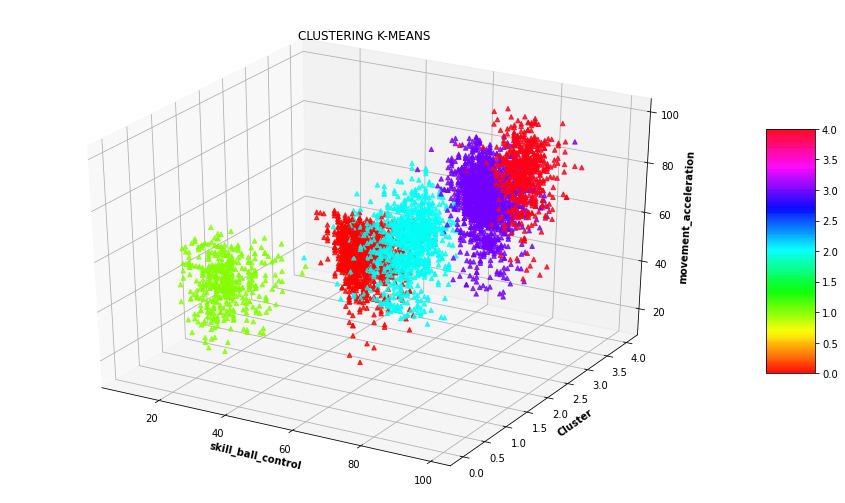

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

z = df_clusters['movement_acceleration']
x = df_clusters['skill_ball_control']
y = df_clusters['kmeans_5']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (y ),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("CLUSTERING K-MEANS")
ax.set_xlabel('skill_ball_control', fontweight ='bold')
ax.set_ylabel('Cluster', fontweight ='bold')
ax.set_zlabel('movement_acceleration', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [ ]:
df_n["player_positions"].str.split(',').str[0]

0        RW
1        ST
2        ST
3        LW
4        CM
       ... 
4589     CM
4590     RB
4591     ST
4592    CDM
4593    NaN
Name: player_positions, Length: 4594, dtype: object

In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

df_n["Position2"]=df_n["player_positions"].str.split(',').str[0].apply(lambda x: pos2(x))
df_n["Position2"].value_counts()

Defender      1485
Forward       1332
Midfielder    1332
GK             444
nan              1
Name: Position2, dtype: int64

In [ ]:
df_n.drop(df_n.loc[df_n['Position2']=='nan'].index, inplace=True)
df_n["Position2"].value_counts()

Defender      1485
Forward       1332
Midfielder    1332
GK             444
Name: Position2, dtype: int64

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

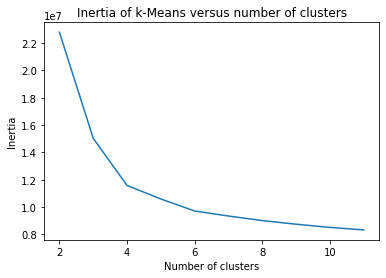

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

##**Clustering con DBSCAN**

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

Text(0, 0.5, 'Distance')

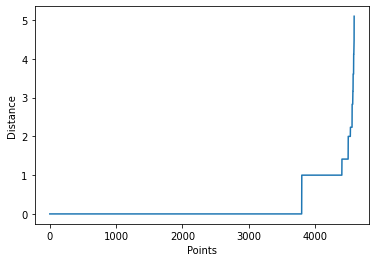

In [ ]:
#BUSCAR EPSILON
k = 2
data_nn = df_n.copy()[['movement_acceleration', 'skill_ball_control']]

# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

In [ ]:
dict_replace = {'Defender' : 0, 'Forward' : 1, 'GK' : 2, 'Midfielder' : 3}
df_n['Position3'] = df_n['Position2']
df_n.replace({"Position3": dict_replace}, inplace=True)

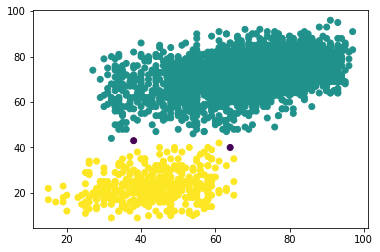

In [ ]:
df_n['dbscan'] = DBSCAN(eps=5, min_samples=5).fit_predict(df_n[['movement_acceleration', 'skill_ball_control']])
plt.scatter(
    df_n['movement_acceleration'],
    df_n['skill_ball_control'],
    c = df_n['dbscan']
    #c = df_n['Position3']
    
)

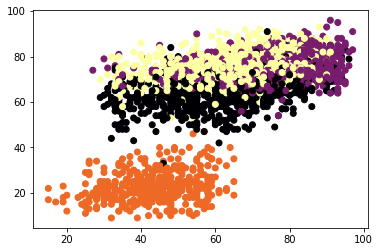

In [ ]:
#grafico por posición:
#'Defender' : 0, 'Forward' : 1, 'GK' : 2, 'Midfielder' : 3

plt.scatter(
    df_n['movement_acceleration'],
    df_n['skill_ball_control'],
    c = df_n['Position3'],
    #c = df_n['Position3']==2,  #ARQUEROS
    cmap='inferno'  #'Set1' 'viridis'
)

# 4 Evaluación y Análisis de los clusters encontrados.


Ajustando la distancia hasta 5, se detectan correctamente los dos clústeres observados a simple vista.
Según las variables 
* "movement_acceleration"
* "skill_ball_control"
Se visualizan dos grandes clústeres, los arqueros en la parte inferior izquierda, el resto de las posiciones va ascendiendo hacia la derecha.
con la ayuda del último gráfico se pueden distinguir por posición la distribución de los clústeres más detalladamente, la cual podría compararse con algún metodo de clustering que pueda dar estos resultados.




#5 Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?


No fue necesario; las variables utilizadas estaban en escala 0 - 100 en el dataset


#6. Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

In [ ]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train = df_pca.select_dtypes(['number'])  #dataset de todos los jugadores FIFA2022
#train = df_n.select_dtypes(['number'])  #solo mejores players

train.drop(['goalkeeping_speed', 'nation_team_id', 'nation_jersey_number'], inplace=True, axis=1)
train = StandardScaler().fit_transform(train)
train = pd.DataFrame(train).dropna()

pca = PCA(n_components=3)
pca_res = pca.fit_transform(train)
train.head(3)

0         1        2          3          4         5         6   \
0 -2.716263  3.957501  3.60178   9.870564  15.972640  1.851089 -1.646467   
1 -1.587450  3.812154  3.43747  15.321406  13.404543  1.429869  0.539166   
2 -7.791226  3.666806  3.27316   5.536158  13.404543  2.272309  0.830584   

         7         8         9         10        11        12        13  \
0 -0.416315 -0.928439 -0.473847  0.505601  0.194531 -0.131273  1.569295   
1  0.856805 -0.929395 -0.473847 -0.667001  0.194531 -0.429500  1.569295   
2  1.139720 -0.929579 -0.473847 -0.778677  0.194531 -0.409618  1.569295   

         14         15         16        17        18        19        20  \
0  2.146241  10.525295   9.293978  1.535460  2.822155  3.345768  3.361178   
1  2.146241  10.525295  12.832924  0.895187  2.822155  2.153952  2.428635   
2  3.448937  10.525295   5.213152  1.718395  2.964492  2.253270  2.635866   

         21        22        23        24        25        26        27  \
0 -1.093541  0.018047  1.964190  2.490076  1.053337  2.217457  2.579532   
1 -0.475848  1.754229  1.187887  2.490076  2.209825  1.803392  2.636180   
2 -1.093541  1.039331  2.075090  2.490076  2.209825  1.458338  2.466236   

         28        29        30        31        32        33        34  \
0  2.147538  2.515375  3.012606  2.524112  2.252136  1.737133  1.021387   
1  1.561936  1.745324  2.488684  1.126551  1.772039  0.814077  0.954565   
2  1.721646  1.855332  2.430471  1.592404  1.772039  1.341538  1.555967   

         35        36        37        38        39        40        41  \
0  1.850364  3.599846  2.159347  2.139433  0.262854  0.552196  0.315265   
1  0.908358  3.489252  1.251806  2.442649  1.665187  0.799952  1.657738   
2  1.513933  3.599846  0.693319  2.745866  2.490088  0.861892  0.947017   

         42        43        44        45        46        47        48  \
0  2.439705 -0.679892 -0.319857  2.174690  3.006228  1.721270  3.131025   
1  2.079086  1.500202  0.115418  2.276621  1.980597  2.672553  2.473077   
2  2.388188  0.439616 -0.851861  2.276621  1.614300  2.545715  3.048782   

         49        50        51        52        53        54        55  \
0 -1.316900 -0.614426 -1.055483 -0.592145 -0.308358 -0.063713 -0.130678   
1 -0.574336 -0.284737 -1.296387 -0.080012 -0.605286 -0.244828 -0.482391   
2 -1.118883 -0.755721 -1.055483 -0.535241 -0.308358 -0.063713 -0.130678   

         56  
0 -0.474818  
1 -0.362988  
2 -0.307073

In [ ]:
df_pca_comp= pd.DataFrame(data= pca.components_, columns= train.columns.values, index=['Component 1', 'Component 2', 'Component 3'])

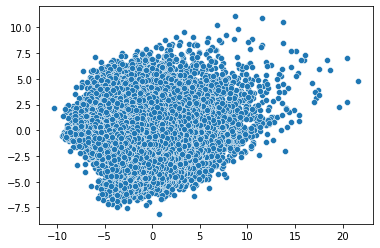

In [ ]:
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], palette = sns.hls_palette(10), legend = 'full');

In [ ]:
scores_pca= pca.transform(train)

In [ ]:
wcss_pca=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss_pca.append(kmeans_pca.inertia_)


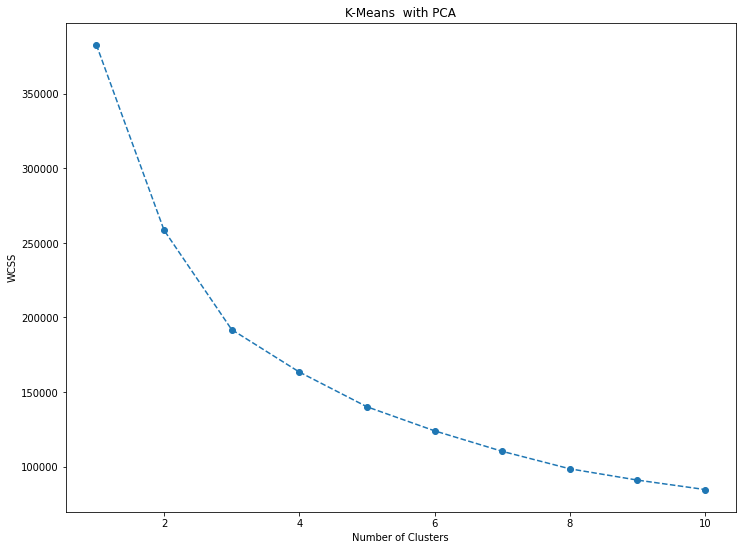

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss_pca, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means  with PCA")
plt.show()

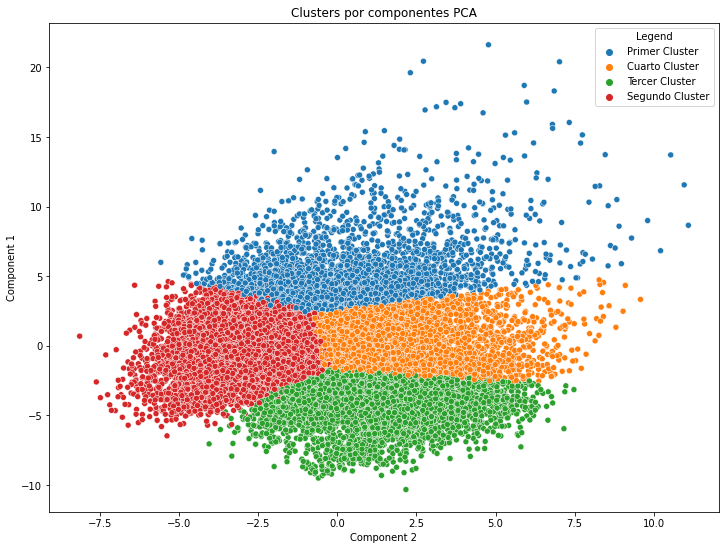

In [ ]:
#K-Means clustering with PCA results
kmeans_pca=KMeans(n_clusters= 4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

df_segm_pca_kmeans= pd.concat([df_n.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3: ]= ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment k-means PCA']= kmeans_pca.labels_
df_segm_pca_kmeans_freq= df_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
"""
df_segm_pca_kmeans_freq['N-obs']=df_segm_pca_kmeans[['Sex','Segment k-means PCA']].groupby(['Segment k-means PCA']).count()
df_segm_pca_kmeans_freq['Prop-obs']=df_segm_pca_kmeans_freq['N-obs']/df_segm_pca_kmeans_freq['N-obs'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Standard',1:'Career Focussed',2: 'Fewer Opportunities',3:'Well off'})
df_segm_pca_kmeans_freq
"""
df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans['Segment k-means PCA'].map({0:'Primer Cluster',1:'Segundo Cluster',2: 'Tercer Cluster',3:'Cuarto Cluster'})
plt.figure(figsize=(12,9))
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'])
#sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'], palette=['g','r','c','m'])
plt.title('Clusters por componentes PCA')
plt.show()

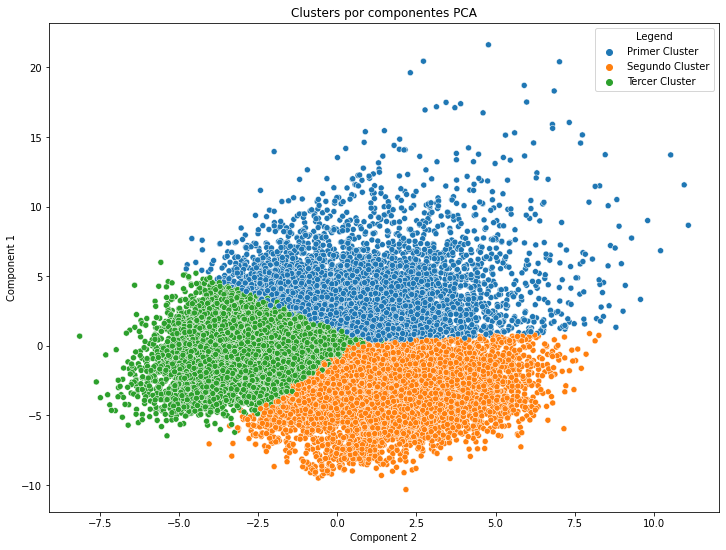

In [ ]:
#K-Means clustering with PCA results
kmeans_pca=KMeans(n_clusters= 3, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

df_segm_pca_kmeans= pd.concat([df_n.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3: ]= ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment k-means PCA']= kmeans_pca.labels_
df_segm_pca_kmeans_freq= df_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
"""
df_segm_pca_kmeans_freq['N-obs']=df_segm_pca_kmeans[['Sex','Segment k-means PCA']].groupby(['Segment k-means PCA']).count()
df_segm_pca_kmeans_freq['Prop-obs']=df_segm_pca_kmeans_freq['N-obs']/df_segm_pca_kmeans_freq['N-obs'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Standard',1:'Career Focussed',2: 'Fewer Opportunities',3:'Well off'})
df_segm_pca_kmeans_freq
"""
df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans['Segment k-means PCA'].map({0:'Primer Cluster',1:'Segundo Cluster',2: 'Tercer Cluster',3:'Cuarto Cluster'})
plt.figure(figsize=(12,9))
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'])
#sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'], palette=['g','r','c','m'])
plt.title('Clusters por componentes PCA')
plt.show()

In [ ]:
df_segm_pca_kmeans#{0:'Primer Cluster',1:'Segundo Cluster',2: 'Tercer Cluster',3:'Cuarto Cluster'})

sofifa_id                                         player_url  \
0       158023.0  https://sofifa.com/player/158023/lionel-messi/...   
1       188545.0  https://sofifa.com/player/188545/robert-lewand...   
2        20801.0  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3       190871.0  https://sofifa.com/player/190871/neymar-da-sil...   
4       192985.0  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
16015        NaN                                                NaN   
16016        NaN                                                NaN   
16017        NaN                                                NaN   
16018        NaN                                                NaN   
16019        NaN                                                NaN   

              short_name                            long_name  \
0               L. Messi       Lionel Andrés Messi Cuccittini   
1         R. Lewandowski                   Robert Lewandowski   
2      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3              Neymar Jr        Neymar da Silva Santos Júnior   
4           K. De Bruyne                      Kevin De Bruyne   
...                  ...                                  ...   
16015                NaN                                  NaN   
16016                NaN                                  NaN   
16017                NaN                                  NaN   
16018                NaN                                  NaN   
16019                NaN                                  NaN   

      player_positions  overall  potential    value_eur  wage_eur   age  \
0           RW, ST, CF     93.0       93.0   78000000.0  320000.0  34.0   
1                   ST     92.0       92.0  119500000.0  270000.0  32.0   
2               ST, LW     91.0       91.0   45000000.0  270000.0  36.0   
3              LW, CAM     91.0       91.0  129000000.0  270000.0  29.0   
4              CM, CAM     91.0       91.0  125500000.0  350000.0  30.0   
...                ...      ...        ...          ...       ...   ...   
16015              NaN      NaN        NaN          NaN       NaN   NaN   
16016              NaN      NaN        NaN          NaN       NaN   NaN   
16017              NaN      NaN        NaN          NaN       NaN   NaN   
16018              NaN      NaN        NaN          NaN       NaN   NaN   
16019              NaN      NaN        NaN          NaN       NaN   NaN   

              dob  height_cm  weight_kg  club_team_id            club_name  \
0      1987-06-24      170.0       72.0          73.0  Paris Saint-Germain   
1      1988-08-21      185.0       81.0          21.0    FC Bayern München   
2      1985-02-05      187.0       83.0          11.0    Manchester United   
3      1992-02-05      175.0       68.0          73.0  Paris Saint-Germain   
4      1991-06-28      181.0       70.0          10.0      Manchester City   
...           ...        ...        ...           ...                  ...   
16015         NaN        NaN        NaN           NaN                  NaN   
16016         NaN        NaN        NaN           NaN                  NaN   
16017         NaN        NaN        NaN           NaN                  NaN   
16018         NaN        NaN        NaN           NaN                  NaN   
16019         NaN        NaN        NaN           NaN                  NaN   

                  league_name  league_level club_position  club_jersey_number  \
0              French Ligue 1           1.0            RW                30.0   
1        German 1. Bundesliga           1.0            ST                 9.0   
2      English Premier League           1.0            ST                 7.0   
3              French Ligue 1           1.0            LW                10.0   
4      English Premier League           1.0           RCM                17.0   
...                       ...           ...      

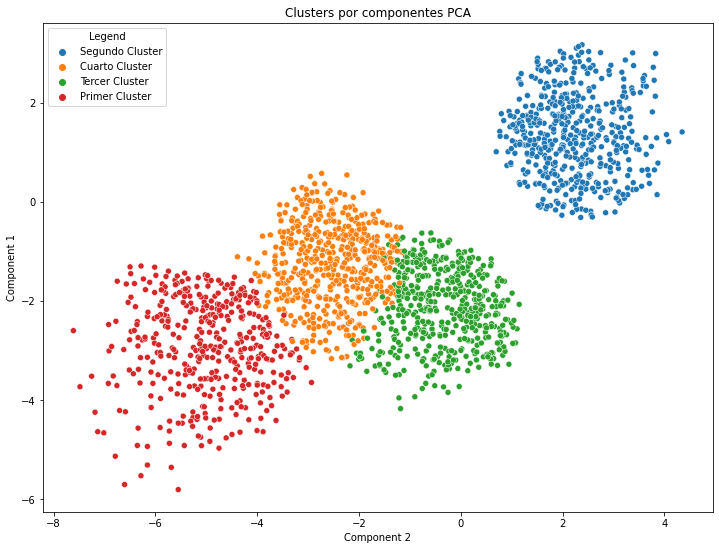

In [ ]:
#K-Means clustering with PCA results
kmeans_pca=KMeans(n_clusters= 40, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

df_segm_pca_kmeans= pd.concat([df_n.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3: ]= ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment k-means PCA']= kmeans_pca.labels_
df_segm_pca_kmeans_freq= df_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
"""
df_segm_pca_kmeans_freq['N-obs']=df_segm_pca_kmeans[['Sex','Segment k-means PCA']].groupby(['Segment k-means PCA']).count()
df_segm_pca_kmeans_freq['Prop-obs']=df_segm_pca_kmeans_freq['N-obs']/df_segm_pca_kmeans_freq['N-obs'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Standard',1:'Career Focussed',2: 'Fewer Opportunities',3:'Well off'})
df_segm_pca_kmeans_freq
"""
df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans['Segment k-means PCA'].map({0:'Primer Cluster',1:'Segundo Cluster',2: 'Tercer Cluster',3:'Cuarto Cluster'})
plt.figure(figsize=(12,9))
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'])
#sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'], palette=['g','r','c','m'])
plt.title('Clusters por componentes PCA')
plt.show()

In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

df_best_without_gk["Position2"]=df_best_without_gk["player_positions"].str.split(',').str[0].apply(lambda x: pos2(x))

dict_replace = {'Defender' : 1, 'Forward' : 3, 'GK' : 0, 'Midfielder' : 2}
df_best_without_gk['Position3'] = df_best_without_gk['Position2']
df_best_without_gk.replace({"Position3": dict_replace}, inplace=True)

df_best_without_gk["Position3"].value_counts()

1    1485
3    1332
2    1332
Name: Position3, dtype: int64

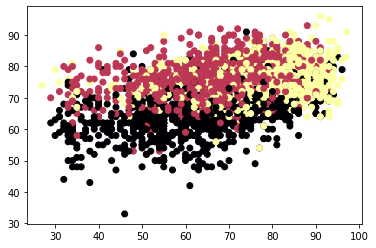

In [ ]:
#grafico por posición:
# 'Defender' : 1, 'Forward' : 3, 'GK' : 0, 'Midfielder' : 2}

plt.scatter(
    df_best_without_gk['movement_acceleration'],
    df_best_without_gk['skill_ball_control'],
    c = df_best_without_gk['Position3'],
    #c = df_n['Position3']==2,  #ARQUEROS
    cmap='inferno'  #'Set1' 'viridis'
)

In [ ]:
df_best_without_gk_n = df_best_without_gk[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [ ]:
# APLICAMOS T-SNE

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_best_without_gk_n)
df_best_without_gk_n['pca-one'] = pca_result[:,0]
df_best_without_gk_n['pca-two'] = pca_result[:,1] 
df_best_without_gk_n['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.47689458 0.17866578 0.08895403]


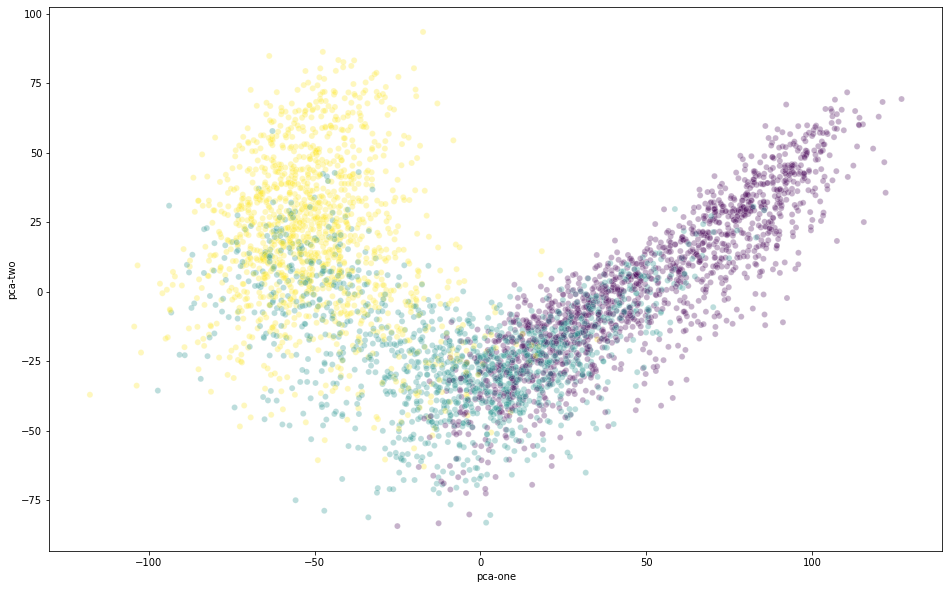

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    c = df_best_without_gk['Position3'],
    palette=sns.color_palette("hls", 10),
    data=df_best_without_gk_n,
    legend="full",
    alpha=0.3
)

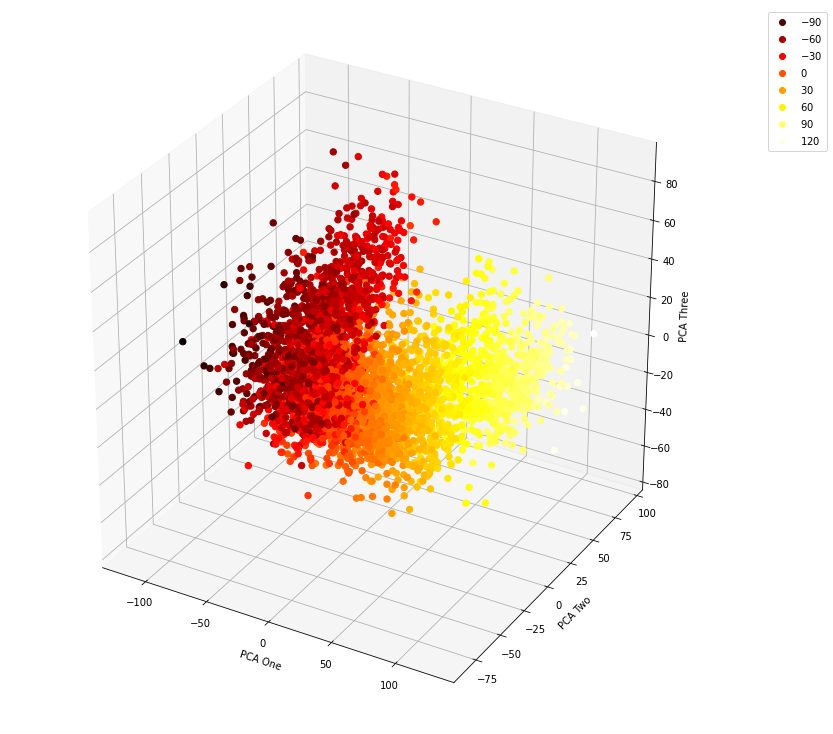

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

x = df_best_without_gk_n['pca-one']
y = df_best_without_gk_n['pca-two']
z = df_best_without_gk_n['pca-three']

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
#sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap='hot', alpha=1)
ax.set_xlabel('PCA One')
ax.set_ylabel('PCA Two')
ax.set_zlabel('PCA Three')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_best_without_gk_n)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4149 samples in 0.001s...
[t-SNE] Computed neighbors for 4149 samples in 0.696s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4149
[t-SNE] Computed conditional probabilities for sample 2000 / 4149
[t-SNE] Computed conditional probabilities for sample 3000 / 4149
[t-SNE] Computed conditional probabilities for sample 4000 / 4149
[t-SNE] Computed conditional probabilities for sample 4149 / 4149
[t-SNE] Mean sigma: 17.097352
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.740707
[t-SNE] KL divergence after 300 iterations: 2.036453


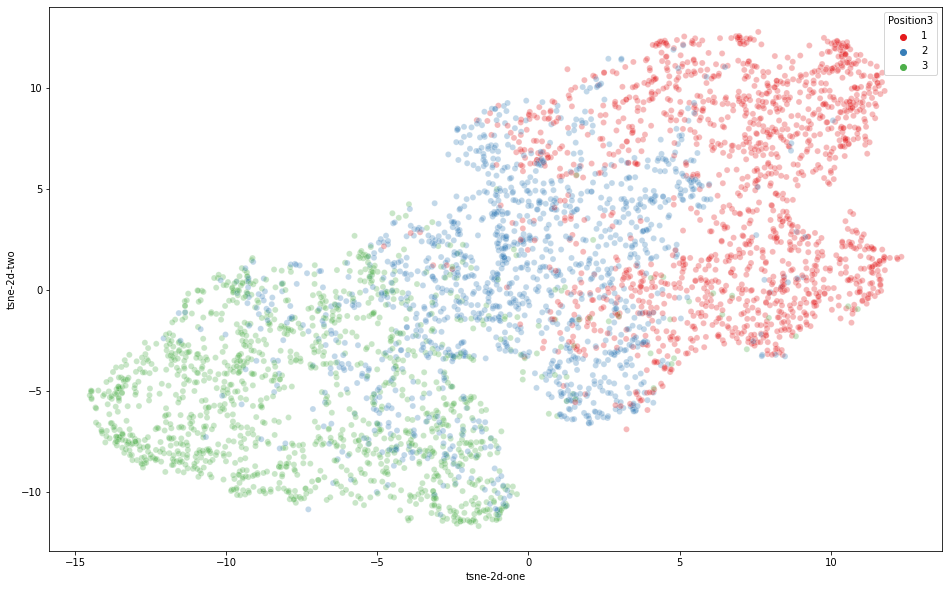

In [ ]:
df_best_without_gk_n['tsne-2d-one'] = tsne_results[:,0]
df_best_without_gk_n['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue = df_best_without_gk['Position3'],  # 'Defender' : 1, 'Forward' : 3, 'GK' : 0, 'Midfielder' : 2}
    palette=sns.color_palette("Set1",3),
    data=df_best_without_gk_n,
    legend="full",
    alpha=0.3
)

In [ ]:
#PRUEBA 3D
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_best_without_gk_n)

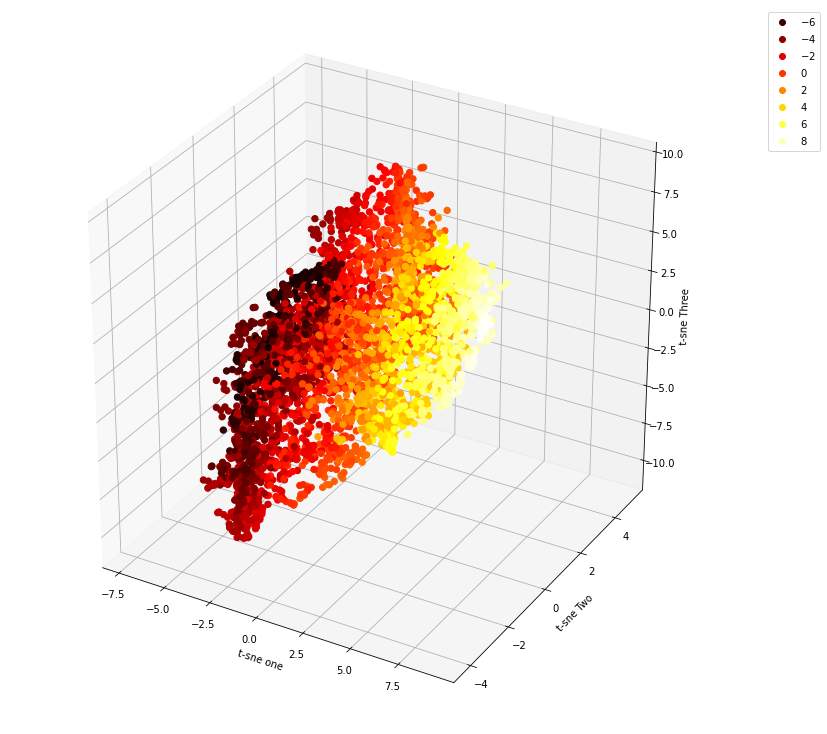

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

x = df_best_without_gk_n['tsne-3d-one'] = tsne_results[:,0]
y = df_best_without_gk_n['tsne-3d-two'] = tsne_results[:,1]
z = df_best_without_gk_n['tsne-3d-three'] = tsne_results[:,2]

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
# sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap='hot', alpha=1)
ax.set_xlabel('t-sne one')
ax.set_ylabel('t-sne Two')
ax.set_zlabel('t-sne Three')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.show()

In [ ]:
df_best_without_gk_n.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'pca-one', 'pca-two',
       'pca-three', 'tsne-2d-one', 'tsne-2d-two', 'tsne-3d-one', 'tsne-3d-two',
       'tsne-3d-three'],
      

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_best_without_gk_n, x='tsne-3d-one', y='tsne-3d-two', z='tsne-3d-three',
                    color=df_best_without_gk['Position3']
                    #symbol='Position3'
                    )
fig.show(renderer='colab')